**Got no f-ing idea what the problem statement is; the only thing Timoshenko's sent is this shitcode, which I don't even want to refactor anymore**

In [4]:
"""
Start along z-axis (normal to surface)
with cross wind (along x-axis):
dx(t)/dt = Vx(t)
dVx(t)/dt = Fwind/m + Frv(V)*Vx/m
dz(t)/dt = Vz(t)
dVz(t)/dt = -g + Frv(V)*Vz/m
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

x0 = 0.0      # m
Vx0 = 0.0     # m/sec
z0 = 0.0      # m
Vz0 = 500.0   # m/sec
m = 0.009     # kg
g = 9.8       # m/sec^2
A = 1.e-5     # N*sec/m
B = 1.e-8     # N*sec^3/m^3
Fwind = 0.01  # N (force of cross wind along x-axis)
tm = 110.0    # sec


def Frv(V):
    # Fuck globals; Fuch that template;
    # Whatever, I'll leave it as it is
    global A, B
    # minus because of resistance force
    # in the opposite direction of velocity
    return -(A*V + B*V**3)/V


def system(t, f):
    global m, g, A, B, Fwind
    x, Vx, z, Vz = f
    V = np.sqrt(Vx**2 + Vz**2)
    dxdt = Vx
    dVxdt = Fwind/m + Frv(V)*Vx/m
    dzdt = Vz
    dVzdt = -g + Frv(V)*Vz/m
    return np.array([dxdt, dVxdt, dzdt, dVzdt])


In [8]:
MIN_N = 1000

end_of_flight = lambda t, y: y[2] - 0 if y[0] > .001 else 1
end_of_flight.terminal = True

solution = solve_ivp(system, [0, tm],
                     [x0, Vx0, z0, Vz0],
                     max_step=tm/MIN_N,
                     events=[end_of_flight])
solution.message

'A termination event occurred.'

In [15]:
def show_stats(system):
    sol = solution.y
    t = solution.t
    x = sol[0, :]
    Vx = sol[1, :]
    z = sol[2, :]
    Vz = sol[3, :]

    nt = len(t)
    Tflight = t[-1]
    numnode = -1

    tmax =round(Tflight+0.5)
    print("tmax=", tmax)
    print("t[numnode]=", t[numnode])
    print("x[numnode]=", x[numnode])
    print("z[numnode]=", z[numnode])
    print("Vx[numnode]=", Vx[numnode])
    print("Vz[numnode]=", Vz[numnode])

    plt.plot(t, Vx, 'r-', linewidth=3)
    plt.plot(t, [0.0]*nt, 'g-', linewidth=1)
    plt.plot([Tflight], [Vx[numnode]], 'bo')
    plt.axis([0, tmax, 0., 40.])
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("Vx(t)")
    plt.savefig("Vx.pdf", dpi=300)
    plt.show()

    plt.plot(t, x, 'b-', linewidth=3)
    plt.axis([0, tmax, 0., 1400.])
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.savefig("x.pdf", dpi=300)
    plt.show()

    plt.plot(t, Vz, 'r-', linewidth=3)
    plt.plot(t, [0.0]*nt, 'g-', linewidth=1)
    plt.axis([0, tmax, -250., 500.])
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("Vz(t)")
    plt.savefig("Vz.pdf", dpi=300)
    plt.show()

    plt.plot(t, z, 'b-', linewidth=3)
    plt.axis([0, tmax, 0., 3500.])
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("z(t)")
    plt.savefig("z.pdf", dpi=300)
    plt.show()

    xx = x[:numnode]
    zz = z[:numnode]
    print("len(xx)=", len(xx))

    plt.plot(xx, zz, 'orangered', linewidth=5)
    plt.axis([0, 1400, 0., 3500.])
    plt.grid(True)
    plt.title("Trajectory")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.savefig("trajectory.pdf", dpi=300)
    plt.show()

tmax= 53.0
t[numnode]= 52.85121087281042
x[numnode]= 1193.4619090519332
z[numnode]= -2.5579538487363607e-13
Vx[numnode]= 33.50505925930391
Vz[numnode]= -190.22941634764507


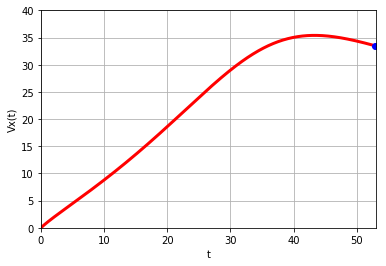

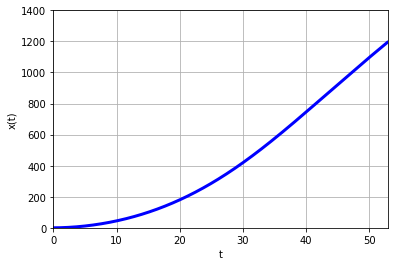

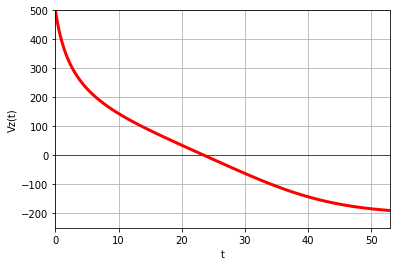

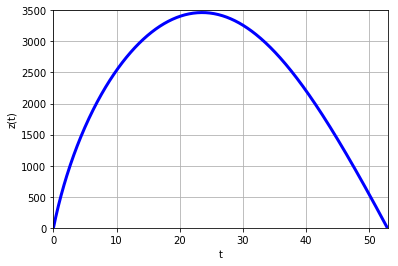

len(xx)= 486


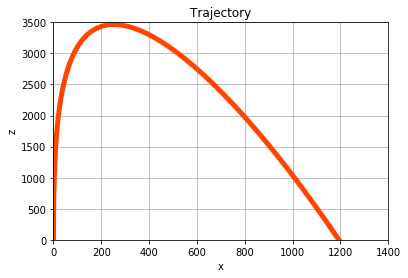

In [16]:
show_stats(system)

In [34]:
def Fwind_dyn(t):
    return Fwind*np.sin(31*np.pi*t)

def system_windy(t, f):
    global m, g, A, B, Fwind_dyn
    Fwind = Fwind_dyn(t)
    x, Vx, z, Vz = f
    V = np.sqrt(Vx**2 + Vz**2)
    dxdt = Vx
    dVxdt = Fwind/m + Frv(V)*Vx/m
    dzdt = Vz
    dVzdt = -g + Frv(V)*Vz/m
    return np.array([dxdt, dVxdt, dzdt, dVzdt])

tmax= 53.0
t[numnode]= 52.85121087281042
x[numnode]= 1193.4619090519332
z[numnode]= -2.5579538487363607e-13
Vx[numnode]= 33.50505925930391
Vz[numnode]= -190.22941634764507


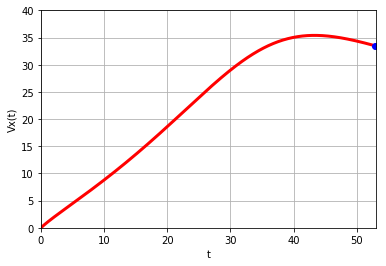

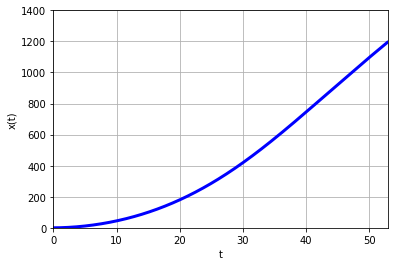

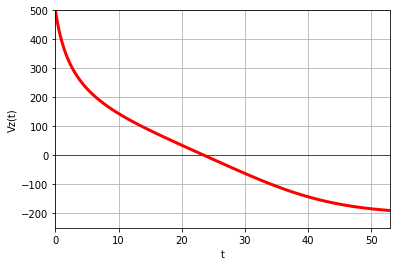

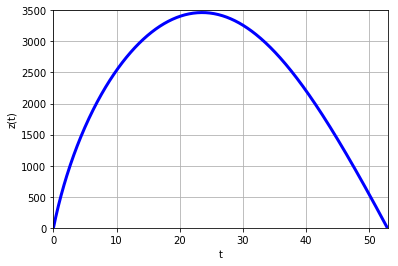

len(xx)= 486


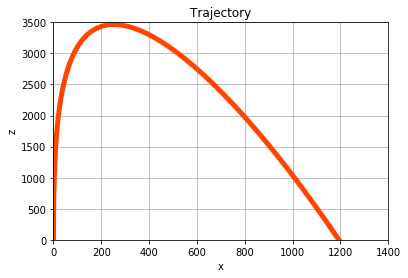

In [35]:
show_stats(system_windy)